# Mortgage Calculator

Author: Arun Manohar

Email: arunmano121@outlook.com

License: BSD-3-Clause

This program calculates the schedule of payments given mortgage parameters. The parameters that are involved in calculating the monthly parameters are home value, down payment, loan term, interest rate, monthly HOA, property tax and home insurance which are roughly based on the property tax rates (1.25%). The monthly schedule of payments are output to an excel file.

In [2]:
# import necessary libraries
# modules necessary to write out excel files
import xlsxwriter
# plotting tools
import matplotlib.pyplot as plt

In [3]:
# visualize payments if needed

def visualize_payments(home_param):
    '''
    Plot principal vs interest over life of loan, and proportion of
    amounts over the life of loan.

    Parameters
    ----------
    home_param: dict
        parameters of the home and the calculated quantities

    Returns
    -------
    None
    '''

    print('-'*60)
    print('visualizing payments...')
    print('-'*60)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.suptitle(('Home Value: \\$%0.2fM, Loan Term: %d years, Int Rate: '
                  '%0.2f%%, Monthly HOA/Mello-Roos: \\$%d, Monthly Maint.:'
                  ' \\$%d')
                 % (home_param['home_val']/1e6, home_param['years'],
                    home_param['int_rate'], home_param['mon_hoa'],
                    home_param['mon_maint']))

    # plot stacked bar chart
    ax[0].bar(home_param['month_h'], home_param['int_h'], color='r')
    ax[0].bar(home_param['month_h'], home_param['prin_h'],
              bottom=home_param['int_h'], color='b')
    ax[0].set_xlabel('Month')
    ax[0].set_ylabel('Principal and Interest ($)')
    ax[0].legend(['Interest', 'Principal'])
    ax[0].set_title('Principal and Interest over life of loan')

    # pie chart to show the total proportion of amount over life of loan
    labels = ['Interest', 'Home Insurance', 'Home Value', 'HOA',
              'Property Tax', 'Maintenance']
    items = [home_param['tot_int'], home_param['tot_home_ins'],
             home_param['home_val'], home_param['tot_hoa'],
             home_param['tot_prop_tax'], home_param['tot_maint']]
    explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
    ax[1].pie(items, explode=explode, labels=labels, autopct='%1.1f%%',
              shadow=True, startangle=90)
    ax[1].set_title('Proportion of different components')
    ax[1].axis('equal')

    plt.tight_layout()
    plt.show()
    return

In [4]:
# write to excel file

def write_excel(title, home_param):
    '''
    write out payment schedule into excel sheet

    Parameters
    ----------
    title: str
        name of the excel file
    home_param: dict
        parameters of the home and the calculated quantities

    Returns
    -------
    None
    '''

    print('-'*60)
    print('writing out payment schedule into excel sheet...')
    print('-'*60)

    # file name to write out
    workbook = xlsxwriter.Workbook(title)
    worksheet = workbook.add_worksheet()

    # setting up necessary formats
    fmt = workbook.add_format({'bold': True})
    money = workbook.add_format({'num_format': '[$$]#,##0.00'})
    pct = workbook.add_format({'num_format': '0.00%'})

    # write out headers using format
    worksheet.write(0, 0, 'Month', fmt)
    worksheet.write(0, 1, 'Interest', fmt)
    worksheet.write(0, 2, 'Principal', fmt)
    worksheet.write(0, 3, 'HOA', fmt)
    worksheet.write(0, 4, 'Home Ins.', fmt)
    worksheet.write(0, 5, 'Prop. Tax', fmt)
    worksheet.write(0, 6, 'Maintenance', fmt)
    worksheet.write(0, 7, 'Mon. Bank Payment', fmt)
    worksheet.write(0, 8, 'Mon. Commitment', fmt)
    worksheet.write(0, 9, 'Out. Principal', fmt)

    # write out individual lines of data
    for i in range(home_param['years']*12):
        worksheet.write(i + 2, 0, i+1)
        worksheet.write(i + 2, 1, home_param['int_h'][i], money)
        worksheet.write(i + 2, 2, home_param['prin_h'][i], money)
        worksheet.write(i + 2, 3, home_param['mon_hoa'], money)
        worksheet.write(i + 2, 4, home_param['mon_home_ins'], money)
        worksheet.write(i + 2, 5, home_param['mon_prop_tax'], money)
        worksheet.write(i + 2, 6, home_param['mon_maint'], money)
        worksheet.write(i + 2, 7, home_param['pay_h'][i], money)
        worksheet.write(i + 2, 8, home_param['mon_pay'], money)
        worksheet.write(i + 2, 9, home_param['out_prin_h'][i], money)

    worksheet.write('L1', 'Home Value', fmt)
    worksheet.write('L2', 'Down Payment', fmt)
    worksheet.write('L3', 'Loan Amt.', fmt)
    worksheet.write('L4', 'Tot. Interest', fmt)
    worksheet.write('L5', 'Tot. Prop. Tax', fmt)
    worksheet.write('L6', 'Tot. Home Ins.', fmt)
    worksheet.write('L7', 'Tot. HOA', fmt)
    worksheet.write('L8', 'Tot. Maintenance', fmt)
    worksheet.write('L9', 'Tot. Payment', fmt)
    worksheet.write('L10', 'Int-Loan Ratio', fmt)
    worksheet.write('L11', '7yr Interest', fmt)
    worksheet.write('L12', 'Int 7yr-Total Ratio', fmt)
    worksheet.write('L13', 'Out. Prin. 7yr', fmt)
    worksheet.write('L14', '10yr Interest', fmt)
    worksheet.write('L15', 'Int 10yr-Total Ratio', fmt)
    worksheet.write('L16', 'Out. Prin. 10yr', fmt)

    worksheet.write('M1', home_param['home_val'], money)
    worksheet.write('M2', home_param['down_pay'], money)
    worksheet.write('M3', home_param['loan_amt'], money)
    worksheet.write('M4', home_param['tot_int'], money)
    worksheet.write('M5', home_param['tot_prop_tax'], money)
    worksheet.write('M6', home_param['tot_home_ins'], money)
    worksheet.write('M7', home_param['tot_hoa'], money)
    worksheet.write('M8', home_param['tot_maint'], money)
    worksheet.write('M9', home_param['tot_pay'], money)
    worksheet.write('M10', home_param['int_loan_rat']/100, pct)
    worksheet.write('M11', home_param['int_7yr'], money)
    worksheet.write('M12', home_param['int_7yr_tot_rat']/100, pct)
    worksheet.write('M13', home_param['out_prin_7yr'], money)
    worksheet.write('M14', home_param['int_10yr'], money)
    worksheet.write('M15', home_param['int_10yr_tot_rat']/100, pct)
    worksheet.write('M16', home_param['out_prin_10yr'], money)

    # finished writing - close the workbook
    workbook.close()

    return


In [5]:
# calculate monthly payments

def calc_mon_pay(out_prin, months, int_rate):
    '''
    calculate monthly payment including interest and principal

    Parameters
    ----------
    out_prin: float
        outstanding principal amount owed to bank
    months: int
        number of remaining months in loan
    int_rate: float
        fixed interest rate

    Returns
    -------
    [payment, interest, principal]: list
        list containing total monthly payment to bank, interest component in
        the monthly payment, principal component in the monthly payment
    '''

    # monthly payment not including home ins and property tax and HOA
    # this only includes the loan amount based payment that is due to bank
    payment = (out_prin * (int_rate / (12 * 100)) /
               (1 - (1 + int_rate / (12 * 100))**(-months)))

    # interest component
    interest = (int_rate/(12 * 100))*out_prin

    # principal component
    principal = payment - interest

    return [payment, interest, principal]


In [6]:
# calculate schedule of payments

def calc_schedule(loan_amt, years, int_rate, loan_type):
    '''
    Calculate schedule of payments month over month

    Parameters
    ----------
    loan_amt: float
        outstanding loan amount
    years: int
        number of years in the loan
    int_rate: float
        fixed interest rate at start of the loan
    loan_type: str
        Indicator to specify if the loan is a regular loan or interest only

    Returns
    -------
    [pay_h, int_h, prin_h, month_h, out_prin_h]: list
        list containing monthly total payment to bank, monthly interest
        component to bank, monthly principal component to bank, month of
        payment in numbers 1, 2, 3... etc, outstanding principal after
        current monthly payment
    '''

    pay_h = []
    int_h = []
    prin_h = []
    month_h = []
    out_prin_h = []

    # at the very start, the outstanding principal is the loan amount
    out_prin = loan_amt

    # iterate through the life of loan
    for months in range(1, years*12 + 1):
        [payment, interest, principal] = \
            calc_mon_pay(out_prin,
                         years*12 - months + 1, int_rate)

        # interest only loan - so set back principal to 0
        if loan_type == 'I':
            principal = 0
            payment = interest

        # outstanding principal reduces every month
        out_prin = out_prin - principal
        # print(months, payment, interest, principal)

        # append the monthly breakdown into the arrays
        pay_h.append(payment)
        int_h.append(interest)
        prin_h.append(principal)
        month_h.append(months)
        out_prin_h.append(out_prin)

        # when the loan is paid off - stop looping, this is relevant when
        # there is additional monthly payments
        if out_prin <= 0:
            break

    return [pay_h, int_h, prin_h, month_h, out_prin_h]


In [7]:
# compute mortgage quantities

def compute_mortgage_quantities(home_param):
    '''
    based on user inputs for the parameters of the home, and other purchase
    factors such as HOA, property tax, etc., this function computes the
    calculated mortgage quantities

    Parameters
    ----------
    home_param: dict
        dictionary that contains the main input quantities and also carries
        the output and computed entities

    Returns
    -------
    home_param: dict
        dictionary that contains the main input quantities and also carries
        the output and computed entities
    '''

    print('-'*60)
    print('computing mortgage quantities...')
    print('-'*60)

    # loan amount is home value minus down payment
    home_param['loan_amt'] = home_param['home_val'] - home_param['down_pay']

    if home_param['loan_type'] == 'R':
        print('Regular Loan')
    else:
        print('Interest Only Loan')

    # loan parameters
    print('Home value: $%0.2f Down payment: $%0.2f Loan amount: $%0.2f'
          % (home_param['home_val'], home_param['down_pay'],
             home_param['loan_amt']))

    # calculate the schedule of payments
    [home_param['pay_h'], home_param['int_h'], home_param['prin_h'],
     home_param['month_h'], home_param['out_prin_h']] = \
        calc_schedule(home_param['loan_amt'], home_param['years'],
                      home_param['int_rate'], home_param['loan_type'])

    if home_param['loan_type'] == 'R':
        # bank monthly payment is sum of principal and interest
        home_param['mon_bank_pay'] = home_param['pay_h'][0]
        print('Monthly payment to bank (Principal + Interest): $%0.2f'
              % (home_param['mon_bank_pay']))
    else:
        # bank monthly payment is interest only
        home_param['mon_bank_pay'] = home_param['pay_h'][0]
        print('Monthly payment to bank (Interest): $%0.2f'
              % (home_param['mon_bank_pay']))

    # total monthly commitment is sum of bank payment, hoa,
    # home ins, prop tax and maintenance
    home_param['mon_pay'] = home_param['mon_bank_pay'] + \
        home_param['mon_hoa'] + home_param['mon_home_ins'] + \
        home_param['mon_prop_tax'] + home_param['mon_maint']
    print('Total monthly commitment: $%0.2f' % (home_param['mon_pay']))

    # total interest over the life of loan
    home_param['tot_int'] = sum(home_param['int_h'])
    print('\nTotal interest payment over %d months: $%0.2f' %
          (home_param['years']*12, home_param['tot_int']))

    # total property tax over the life of loan
    home_param['tot_prop_tax'] = home_param['mon_prop_tax'] * \
        12 * home_param['years']
    print('Total taxes over the %d months: $%0.2f' %
          (home_param['years']*12, home_param['tot_prop_tax']))

    # total home insurance over the life of loan
    home_param['tot_home_ins'] = home_param['mon_home_ins'] * 12 * \
        home_param['years']
    print('Total home insurance over the %d months: $%0.2f' %
          (home_param['years']*12, home_param['tot_home_ins']))

    # total HOA over the life of loan
    home_param['tot_hoa'] = home_param['mon_hoa'] * \
        12 * home_param['years']
    print('Total HOA/Mello-Roos over the %d months: $%0.2f' %
          (home_param['years']*12, home_param['tot_hoa']))

    # total maintenance over the life of loan
    home_param['tot_maint'] = home_param['mon_maint'] * \
        12 * home_param['years']
    print('Total maintenance over the %d months: $%0.2f' %
          (home_param['years']*12, home_param['tot_maint']))

    # total payment over the life of loan
    home_param['tot_pay'] = home_param['down_pay'] + home_param['years'] * \
        12 * home_param['mon_pay']
    print('Total payment over the %d months: $%0.2f' %
          (home_param['years']*12, home_param['tot_pay']))

    # ratio of interest to money borrowed from bank
    home_param['int_loan_rat'] = home_param['tot_int'] /\
        home_param['loan_amt']*100
    print('\nInterest-Loan Ratio: %0.2f%%' % (home_param['int_loan_rat']))

    # interest that is paid over the first 7 years
    home_param['int_7yr'] = sum(home_param['int_h'][0:7*12])
    print('\nInterest paid over the first 7 years: $%0.2f'
          % (home_param['int_7yr']))

    # Proportion of interest that is paid over the first 7 years
    home_param['int_7yr_tot_rat'] = home_param['int_7yr'] / \
        home_param['tot_int'] * 100
    print('Proportion of total interest paid in first 7 years: %0.2f%%' %
          (home_param['int_7yr_tot_rat']))

    # Outstanding principal after first 7 years
    home_param['out_prin_7yr'] = home_param['out_prin_h'][7*12-1]
    print('Outstanding principal after 7 years: $%0.2f'
          % (home_param['out_prin_7yr']))

    # Principal paid in 7 years
    print('Principal paid in 7 years: $%0.2f'
          % (home_param['loan_amt'] - home_param['out_prin_7yr']))

    # interest that is paid over the first 10 years
    home_param['int_10yr'] = sum(home_param['int_h'][0:10*12])
    print('\nInterest paid over the first 10 years: $%0.2f'
          % (home_param['int_10yr']))

    # Proportion of interest that is paid over the first 10 years
    home_param['int_10yr_tot_rat'] = home_param['int_10yr'] / \
        home_param['tot_int'] * 100
    print('Proportion of total interest paid in first 10 years: %0.2f%%' %
          (home_param['int_10yr_tot_rat']))

    # Outstanding principal after first 10 years
    home_param['out_prin_10yr'] = home_param['out_prin_h'][10*12-1]
    print('Outstanding principal after 10 years: $%0.2f'
          % (home_param['out_prin_10yr']))

    # Principal paid in 10 years
    print('Principal paid in 10 years: $%0.2f'
          % (home_param['loan_amt'] - home_param['out_prin_10yr']))

    return home_param


In [8]:
# check if inputs are valid

def get_valid_input(msg):
    '''
    gets valid inputs for the home prices or down payments in a variety of
    formats - the user could enter like 1M or 1000000 or 1000K or $1M, etc.

    Parameters
    ----------
    msg: str
        message to be printed on the screen

    Returns
    -------
    None
    '''

    while True:
        try:
            # get input
            inp = input(msg)
            mod = float(inp.strip(' kK$%Mm,'))

            # check to see if value is in 1000's
            if 'k' in inp or 'K' in inp:
                val = mod * 1000

            # check to see if value is in 1000000's
            elif 'm' in inp or 'M' in inp:
                val = mod * 1000000

            # else value is as listed
            else:
                val = mod
            break

        except Exception as e:
            print(e)
            print('Enter as 100000 or $10,000 or $100K or 100K')

    return val

In [9]:
# a function to get user inputs

def get_inputs(home_param):
    '''
    gets user inputs for the parameters of the home, and other purchase
    factors such as HOA, property tax, etc.

    Parameters
    ----------
    home_param: dict
        dictionary that contains the main input quantities and also carries
        the output and computed entities

    Returns
    -------
    home_param: dict
        dictionary that contains the main input quantities and also carries
        the output and computed entities
    write_amort_flag: bool
        flag that indicates if amortization table needs to be computed
    visualize_amort_flag: bool
        flag to indicate if amortization needs to be visualized
    '''

    # home value
    home_param['home_val'] = get_valid_input('Home value: ')

    # downpayment - typically less than 30% of home value or amount
    # enter maximum down payment possible
    home_param['down_pay'] = get_valid_input('Down payment: ')

    # regular loan or interest only loan
    home_param['loan_type'] = str(input('Reg. loan (R) or Int. only (I): '))

    # loan term in years
    home_param['years'] = int(input('Loan term (years): '))

    # interest rate
    home_param['int_rate'] = float(input('Interest rate (%): '))

    # Monthly HOA and Mello-Roos
    home_param['mon_hoa'] = int(input('Monthly HOA and Mello-Roos ($): '))

    # Monthly maintenance
    home_param['mon_maint'] = int(input('Monthly maintenance ($): '))

    # monthly property tax - typically around 1.25% in San Diego, CA area
    home_param['prop_tax_pct'] = \
        float(input('Property tax percentage (%): '))

    # monthly property tax
    home_param['mon_prop_tax'] = home_param['home_val'] * \
        home_param['prop_tax_pct'] / 100 / 12

    # typical monthly home insurance
    home_param['mon_home_ins'] = home_param['home_val'] * \
        home_param['prop_tax_pct'] / 100 / 10 / 12

    # write out amortization schedule
    write_amort_flag = input('Write amortization schedule (y/n): ')

    # visualize amortization schedule
    visualize_amort_flag = input('Visualize amortization schedule (y/n): ')

    return home_param, write_amort_flag, visualize_amort_flag

Home value:  1.2M
Down payment:  400K
Reg. loan (R) or Int. only (I):  R
Loan term (years):  30
Interest rate (%):  7
Monthly HOA and Mello-Roos ($):  0
Monthly maintenance ($):  500
Property tax percentage (%):  1.125
Write amortization schedule (y/n):  y
Visualize amortization schedule (y/n):  y


------------------------------------------------------------
computing mortgage quantities...
------------------------------------------------------------
Regular Loan
Home value: $1200000.00 Down payment: $400000.00 Loan amount: $800000.00
Monthly payment to bank (Principal + Interest): $5322.42
Total monthly commitment: $7059.92

Total interest payment over 360 months: $1116071.19
Total taxes over the 360 months: $405000.00
Total home insurance over the 360 months: $40500.00
Total HOA/Mello-Roos over the 360 months: $0.00
Total maintenance over the 360 months: $180000.00
Total payment over the 360 months: $2941571.19

Interest-Loan Ratio: 139.51%

Interest paid over the first 7 years: $376262.59
Proportion of total interest paid in first 7 years: 33.71%
Outstanding principal after 7 years: $729179.31
Principal paid in 7 years: $70820.69

Interest paid over the first 10 years: $525189.46
Proportion of total interest paid in first 10 years: 47.06%
Outstanding principal after 10 years: 

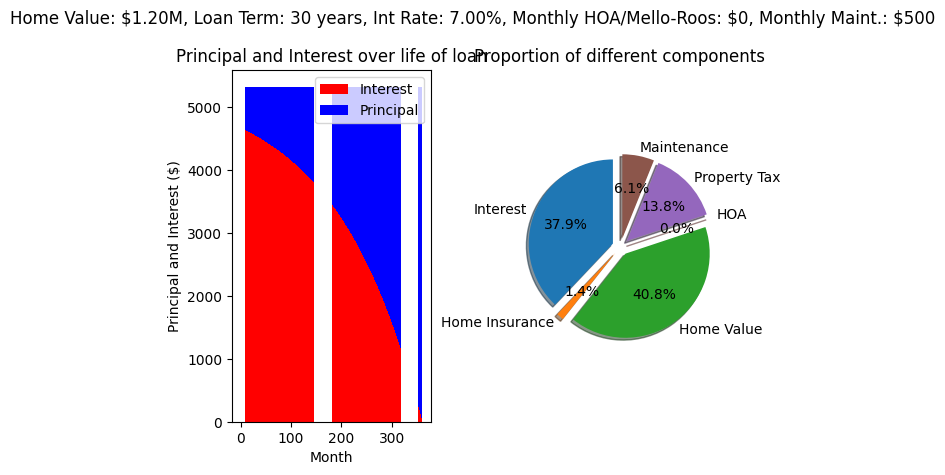

In [11]:
# main driver section that calls the other functions

# dictionary to store the essential parameters
home_param = {}

# get inputs
home_param, write_amort_flag, visualize_amort_flag = \
    get_inputs(home_param)

# computing mortgage quantities
home_param = compute_mortgage_quantities(home_param)

if write_amort_flag.upper() == 'Y':
    # write the breakdown into excel file
    title = 'monthly_schedule.xlsx'  # title for the excel file
    write_excel(title, home_param)

if visualize_amort_flag.upper() == 'Y':
    # plot principal vs interest over life of loan, and proportion of
    # amounts over the life of loan
    visualize_payments(home_param)
